In [3]:
import os 
import pandas as pd

ITERATIONS = 5
columns=["dataset", "mtl", 'gamma', "accuracy", "precision", "recall", "duration"]
stl_results_fcn = pd.DataFrame(columns=columns)
stl_results_res = pd.DataFrame(columns=columns)


for idx, dataset in enumerate(['Coffee','Beef','GunPoint']):#enumerate(os.listdir('./archives/ucr')):

    bac = 0; acc=0; precision=0; recall=0; duration=0

    for classifier in ['ae','conv']: 

        for gamma in [0.25,0.5,0.75]:

            stl_results_fcn_i = pd.DataFrame(columns=columns)
            stl_results_res_i = pd.DataFrame(columns=columns)

            for itr in range(ITERATIONS): 
                fcn_model = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/fcn/fcn_mt_{classifier}_{gamma}_{itr}/{"fcn_ig_raw"}/df_best_model.csv')
                fcn_metrics = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/fcn/fcn_mt_{classifier}_{gamma}_{itr}/{"fcn_ig_raw"}/task1_df_metrics.csv')
                res_model = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/resnet/resnet_mt_{classifier}_{gamma}_{itr}/{"resnet_ig_raw"}/df_best_model.csv')
                res_metrics = pd.read_csv(f'./results/ucr/{dataset}/experiment_2/resnet/resnet_mt_{classifier}_{gamma}_{itr}/{"resnet_ig_raw"}/task1_df_metrics.csv')
                                

                fcn_vals = [fcn_metrics["accuracy"].values[0], fcn_metrics["precision"].values[0],
                            fcn_metrics["recall"].values[0], fcn_metrics["duration"].values[0]] 
                res_vals = [res_metrics["accuracy"].values[0], res_metrics["precision"].values[0],
                            res_metrics["recall"].values[0], res_metrics["duration"].values[0]] 
                #Read STL results for FCN classifier
                if itr == 0:
                    stl_results_fcn_i.loc[idx] = [dataset,classifier,gamma] + fcn_vals
                    stl_results_res_i.loc[idx] = [dataset,classifier,gamma] + res_vals
                else:
                    stl_results_fcn_i.loc[idx, columns[3:]] += fcn_vals
                    stl_results_res_i.loc[idx, columns[3:]] += res_vals

            stl_results_fcn_i.loc[idx, columns[3:]] /= ITERATIONS
            stl_results_res_i.loc[idx, columns[3:]] /= ITERATIONS

            stl_results_fcn = stl_results_fcn.append(stl_results_fcn_i)
            stl_results_res = stl_results_res.append(stl_results_res_i)

C:\Users\boent\AppData\Local\Temp\ipykernel_25700\1577222313.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stl_results_fcn = stl_results_fcn.append(stl_results_fcn_i)
C:\Users\boent\AppData\Local\Temp\ipykernel_25700\1577222313.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stl_results_res = stl_results_res.append(stl_results_res_i)
C:\Users\boent\AppData\Local\Temp\ipykernel_25700\1577222313.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stl_results_fcn = stl_results_fcn.append(stl_results_fcn_i)
C:\Users\boent\AppData\Local\Temp\ipykernel_25700\1577222313.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stl_resu

In [4]:
stl_results_fcn

,dataset,mtl,gamma,accuracy,precision,recall,duration
0,Coffee,ae,0.25,1.000000,1.000000,1.000000,113.954075
0,Coffee,ae,0.50,1.000000,1.000000,1.000000,94.191639
0,Coffee,ae,0.75,1.000000,1.000000,1.000000,93.206524
0,Coffee,conv,0.25,1.000000,1.000000,1.000000,66.178604
0,Coffee,conv,0.50,1.000000,1.000000,1.000000,65.939652
0,Coffee,conv,0.75,1.000000,1.000000,1.000000,66.309792
1,Beef,ae,0.25,0.460000,0.424017,0.460000,83.024771
1,Beef,ae,0.50,0.520000,0.570268,0.520000,81.419965
1,Beef,ae,0.75,0.546667,0.568739,0.546667,81.981239
1,Beef,conv,0.25,0.533333,0.627525,0.533333,60.528697


In [8]:
stl_results_res

,dataset,mtl,gamma,accuracy,precision,recall,duration
0,Coffee,ae,0.25,1.000000,1.000000,1.000000,217.618979
0,Coffee,ae,0.50,1.000000,1.000000,1.000000,216.695951
0,Coffee,ae,0.75,1.000000,1.000000,1.000000,202.329281
0,Coffee,conv,0.25,1.000000,1.000000,1.000000,131.137484
0,Coffee,conv,0.50,1.000000,1.000000,1.000000,134.400513
0,Coffee,conv,0.75,1.000000,1.000000,1.000000,128.163118
1,Beef,ae,0.25,0.713333,0.727556,0.713333,161.118575
1,Beef,ae,0.50,0.726667,0.734841,0.726667,158.930933
1,Beef,ae,0.75,0.766667,0.787698,0.766667,167.732652
1,Beef,conv,0.25,0.666667,0.692460,0.666667,89.617212


### Calculate Custom Metrics for Attribution Method


In [1]:
import tensorflow_addons as tfa
from utils.explanations import integrated_gradients
from keras.utils import CustomObjectScope
import tensorflow.keras as keras
import tensorflow as tf
import os
from utils.explanations import minmax_norm
from utils.explanations import calculate_ig_attributions
from sklearn.metrics import mean_absolute_error, mean_squared_error
from utils.utils import read_dataset
from sklearn.preprocessing import normalize
import numpy as np



# Load model to calculate custom metrics 
def load_model(root_dir, archive_name, dataset_name, classifier, data_source): 
    with CustomObjectScope({'InstanceNormalization':tfa.layers.InstanceNormalization()}):
        model_path = f'{root_dir}/results/{archive_name}/{dataset_name}/' \
                                                + f'{classifier.split("_")[0]}/{classifier}/{data_source}/' \
                                                + f'best_model.hdf5'
        model =keras.models.load_model(model_path ,compile=False)
        return model
    

def norm(values): 
    if not type(values) == np.ndarray:
        return normalize(values.numpy().reshape(1,-1))[0]
    else: 
        return normalize(values.reshape(1,-1))[0]
    
#define shared trunk
network = 'fcn' 
    
#store custom metrics for model
models_train  = dict()
models_test   = dict()
# Loop over data

archive = 'ucr'
dataset_name = 'Beef'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'

itr=1

gamma = 0.75

form = 'trf'

for idx, dataset in enumerate(['Beef']):
    print(dataset)
    ylen = 1
    #Just for now:

    data = read_dataset(data_p, archive, dataset, 'original', ylen)[dataset]
    #assertion,each ts has same length
    ylen = len(data[0][0])

    for gamma in [0.75,0.5,0.25]:
        #fcn_mt_ae','fcn_mt_conv','resnet_mt_ae','resnet_mt_conv'
        for model in ['resnet_mt_ae']:#'fcn_mt_linear','resnet_mt_ae','resnet_mt_conv']: #'fcn_mt_linear']: #['fcn_mt_ae','fcn_mt_conv', 'fcn_mt_linear']: 
            model_type = model.split('_')[0] 
            print(model)
            try: 


                #Load initial values after STL training
                #cam_data_stl = read_dataset(data_p, archive, dataset, 'fcn_cam_raw', ylen)[dataset]
                ig_data_stl  = read_dataset(data_p, archive, dataset, f'{model_type}_ig_{form}', ylen)[dataset]
                #Load required models
                #cam_link = f'./results/ucr/{dataset}/fcn/fcn_mt_ae_0.0/fcn_cam_raw/best_model.hdf5'
                #ucr\GunPoint\experiment_1\fcn\fcn_mt_ae_0\fcn_ig_raw
            
                ig_link  = f'./results/ucr/{dataset}/experiment_2/{model_type}/{model}_{gamma}_{itr}/{model_type}_ig_{form}/best_model.hdf5'
                #f'./results/ucr/{dataset}/experiment_1/fcn/fcn_{itr}/original/
                #cam_model =keras.models.load_model(cam_link ,compile=False)
                ig_model = keras.models.load_model(ig_link ,compile=False)

                #Calculate new  attributions
                ig_attributions = calculate_ig_attributions(data_p, archive, f"{model}_{gamma}_{itr}", dataset, f"{model_type}_ig_{form}", task=1, experiment=2)
                #ig_attributions_t2 = calculate_ig_attributions(data_p, archive, f"{model}_{gamma}_{itr}", dataset, f"{model_type}_ig_raw", task=2, experiment=2)
                # train and test data
                # 1,3 are the labels:  
                for t in [1,3]:
                    
                    tc = t 
                    #Pearson and mse [p,m]
                    pm1 = 0; pm2 = 0; pm3 = 0; pm4 = 0;  mm1 = 0; mm2 = 0; mm3 = 0; mm4 = 0
                    #predict values for all timeseries 
                    print("pred", t, data[t-1].shape)

                    pred = ig_model.predict(data[t-1])
                    #run loop
                    for ts in range(len(data[t])):                
                        #small workaround
                        #structure of attributions 0 --> train 1 --> test set
                        pm1 += np.corrcoef(pred[1][ts].flatten(),ig_data_stl[t][ts])[0,1]
                        pm2 += np.corrcoef(pred[1][ts].flatten(),ig_attributions[0 if t == 1 else 1][ts][2])[0,1]
                        pm3 += np.corrcoef(ig_data_stl[t][ts],ig_attributions[0 if t == 1 else 1][ts][2])[0,1]
                        #pm4 += np.corrcoef(pred[1][ts].flatten(),ig_attributions_t2[0 if t == 1 else 1][ts][2])[0,1]
                        mm1 += mean_squared_error(pred[1][ts].flatten(),ig_data_stl[t][ts])
                        mm2 += mean_squared_error(pred[1][ts].flatten(),ig_attributions[0 if t == 1 else 1][ts][2])
                        mm3 += mean_squared_error(ig_data_stl[t][ts],ig_attributions[0 if t == 1 else 1][ts][2])
                        #mm4 += mean_squared_error(pred[1][ts].flatten(),ig_attributions_t2[0 if t == 1 else 1][ts][2])
                    #Init for model 
                    l = len(data[t])
                    if t == 1: 
                        #f'{dataset}_{model.split("_")[-1]}'
                        models_train[f'{dataset}_{model}_{gamma}'] = {"model" : model, "gamma" : gamma, "pm1":pm1/l,"pm2": pm2/l,"pm3": pm3/l,"pm4": pm4/l,
                                                                            "mm1":mm1/l, "mm2": mm2/l, "mm3": mm3/l} # "mm4": mm4/l
                    else: 
                        models_test[f'{dataset}_{model}_{gamma}'] = {"model" : model, "gamma" : gamma, "pm1":pm1/l,"pm2": pm2/l,"pm3": pm3/l,"pm4": pm4/l,
                                                                            "mm1":mm1/l, "mm2": mm2/l, "mm3": mm3/l}#"mm4": mm4/l
                    
            except Exception as e: 
                print(dataset,"error", e)
                pass


#./results/ucr/GunPoint/experiment_1/resnet/resnet_mt_conv_0/resnet_ig_raw/last_model.hdf5    
#./results/ucr/Beef/experiment_2/fcn/fcn_mt_ae_0.75_0/fcn_ig_raw/best_model.hdf5
# results\ucr\Beef\experiment_2\fcn\fcn_mt_ae_0.75_2/fcn_ig_raw/best_model.hdf5
#./results\ucr\Beef\experiment_2\fcn\fcn_mt_ae_0.75_0\fcn_ig_raw\best_model.hdf5
#./results/ucr/Beef/experiment_2/fcn/fcn_mt_ae_0.75_0/fcn_ig_raw/best_model.hdf5
#./results\ucr\Beef\experiment_2\fcn\fcn_mt_ae_0.75_0\fcn_ig_raw\best_model.hdf5
#./results/ucr/Beef/experiment_2/fcn/fcn_mt_ae_0.75_0/fcn_ig_raw/best_model.hdf5

c:\Users\boent\anaconda3\envs\xai-tsc\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Beef
resnet_mt_ae
G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/Beef//experiment_2/resnet/resnet_mt_ae_0.75_1/resnet_ig_raw/last_model.hdf5
1/1 [==============================] - 0s 132ms/step
G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/Beef//experiment_2/resnet/resnet_mt_ae_0.75_1/resnet_ig_raw/last_model.hdf5
1/1 [==============================] - 0s 114ms/step
pred 1 (30, 470)
1/1 [==============================] - 2s 2s/step
pred 3 (30, 470)
1/1 [==============================] - 0s 104ms/step
resnet_mt_ae
G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/Beef//experiment_2/resnet/resnet_mt_ae_0.5_1/resnet_ig_raw/last_model.hdf5
1/1 [==============================] - 0s 120ms/step
G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/Beef//experiment_2/resnet/resnet_mt_ae_0.5_1/resnet_ig_raw/last_model.hdf5
1/1 [==============================] - 0s 121ms/step
pred 1 (30, 470)
1/1 [==============================] - 1s 1s/step
pred 3 (30, 470)
1/1 [=========

In [12]:
pd.DataFrame(models_train).T

,model,gamma,pm1,pm2,pm3,pm4,mm1,mm2,mm3,mm4
Beef_fcn_mt_ae_0.75,fcn_mt_ae,0.75,0.331603,0.272259,0.429108,0.114252,0.000198,0.000339,0.000331,0.003009
Beef_fcn_mt_conv_0.75,fcn_mt_conv,0.75,0.124472,0.076745,0.249252,-0.116024,0.00061,0.000663,0.000411,0.005505
Beef_resnet_mt_ae_0.75,resnet_mt_ae,0.75,0.617518,0.316148,0.530732,0.048264,0.000522,0.001941,0.00168,0.051803
Beef_resnet_mt_conv_0.75,resnet_mt_conv,0.75,0.168033,0.093493,0.607844,0.032982,0.001516,0.004591,0.003011,0.144411
Beef_fcn_mt_ae_0.5,fcn_mt_ae,0.5,0.328575,0.20198,0.756274,-0.061524,0.000183,0.00021,0.000083,0.001816
Beef_fcn_mt_conv_0.5,fcn_mt_conv,0.5,0.16666,0.140336,0.53865,-0.126469,0.000566,0.000617,0.00019,0.004848
Beef_resnet_mt_ae_0.5,resnet_mt_ae,0.5,0.547337,0.32018,0.502918,0.144535,0.00063,0.001264,0.001187,0.033846
Beef_resnet_mt_conv_0.5,resnet_mt_conv,0.5,0.212548,0.128965,0.598759,0.004405,0.001787,0.008569,0.005877,0.948816
Beef_fcn_mt_ae_0.25,fcn_mt_ae,0.25,0.141048,0.13435,0.659017,0.093153,0.001072,0.001036,0.000094,0.001503
Beef_fcn_mt_conv_0.25,fcn_mt_conv,0.25,0.040151,-0.019407,0.776616,-0.151304,0.002863,0.002884,0.00007,0.006746


In [6]:
models_test

{}

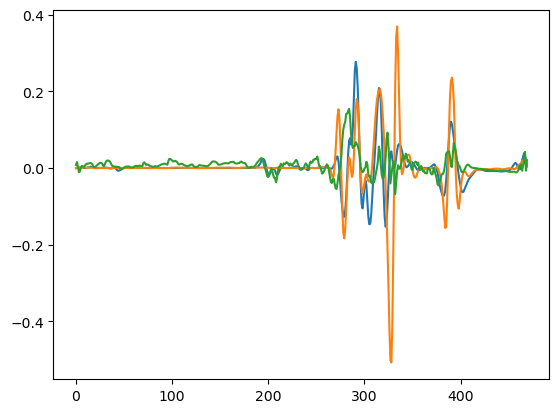

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ig_data_stl[3][ts])
plt.plot(ig_attributions[1][ts][2])
plt.plot(pred[1][ts].flatten())